## Model 1 

This model begins the model building process by trying to build a CNN model after having difficulty with loading the images. We can now begin choosing different parameters and models. 

This notebook begins by loading the JPEG images with their corresponding severity labels. Since the images are not a subdirectory and are not annotated, we had to manually load the images and join them with its corresponding labels using ```os.path.join``` and define a function to resize, normalize and split the training and testing sets instead of the automated ```tf.keras.utils.image_dataset_from_directory``` which creates includes preprocessing and spliting of the data automatically. 

This model was succssfull in completing in obtaining accuracy and loss on the training and testing set, however, when performing prediction on the testing set was halted due to an corrupted image file or an image file with an impropoer format.

The epoch is set to 1 for the meantime while trying to figure out a reoccuring error when predicting the test set. 

___For this part there needs to be more preprocessing and data integreity check.___



Further filtering and tuning can include the following: 
* Reducing epochs and increasing image sizes to reduce loss of spatial information which can be important for detecting 
* Explore more model architecures and modifying filters 
* look at pretrained image detection models and see what aspects I can modify to detect severity with higher recall. 

In [1]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
folder = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/dataset'
labels = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/DATASETS/train_score_dec29.csv'

In [3]:
base_image_dir = os.path.join('/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/dataset/train')
image_dataset = pd.read_csv(os.path.join(base_image_dir, 'train_score_dec29.csv')) 
#the images are not annotated with classes, so we need to join the csv file with the image names and labels with the images in a single path. 


image_dataset['PatientId'] = image_dataset['image'].map(lambda x: x.split('_')[0]) #getting the image ID from the image name
image_dataset['path'] = image_dataset['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x))) #creating a new column and appending the full file path for each image. 

image_dataset['exists'] = image_dataset['path'].map(os.path.exists) #making sure that every image exists in the labels csv and the image itself. 


print(image_dataset['exists'].sum(), 'images found of', image_dataset.shape[0], 'total') #print how many images are found in the csv and images. 
image_dataset['eye'] = image_dataset['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0) #creating a binary column for left and right eye image. left = 1 and right =0. 

image_dataset['level_cat'] = image_dataset['level'].map(lambda x: to_categorical(x, 1+image_dataset['level'].max())) # creating a categorical column that includes one-hot encoded labels for the level of severity. 

image_dataset.dropna(inplace = True) 
image_dataset = image_dataset[image_dataset['exists']] #eliminate any labels to any images that are not found in the directory. 
image_dataset.sample(13)
#os.path.join
#code obtained from: https://www.kaggle.com/code/kmader/inceptionv3-for-retinopathy-gpu-hr 

8408 images found of 8408 total


,image,level,PatientId,path,exists,eye,level_cat
6349,1049_left,2,1049,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3051,12561_left,0,12561,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
5957,1847_left,0,1847,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
5908,14160_right,2,14160,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[0.0, 0.0, 1.0, 0.0, 0.0]"
5984,19456_right,0,19456,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4193,15745_right,0,15745,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
8327,10242_right,0,10242,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
3833,16458_left,1,16458,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[0.0, 1.0, 0.0, 0.0, 0.0]"
654,19221_right,0,19221,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
715,13684_left,2,13684,/Users/shivanassori/Desktop/Folders/Data_Scien...,True,1,"[0.0, 0.0, 1.0, 0.0, 0.0]"


In [4]:
image_dataset.to_csv('image_dataset.csv', index=False)

In [5]:
#checking again if all the images are valid 
def is_valid_image(img_path):
    try:
        img = Image.open(img_path)
        img.verify()  # Verifies if the file is a valid image
        return True
    except (IOError, SyntaxError) as e:
        print(f'Invalid image: {img_path} - {e}')
        return False
    
image_dataset['valid'] = image_dataset['path'].map(is_valid_image)

image_dataset = image_dataset[image_dataset['valid']]

image_dataset.drop(columns=['valid'], inplace=True)

print(image_dataset['exists'].sum(), 'images found of', image_dataset.shape[0], 'total')


8408 images found of 8408 total


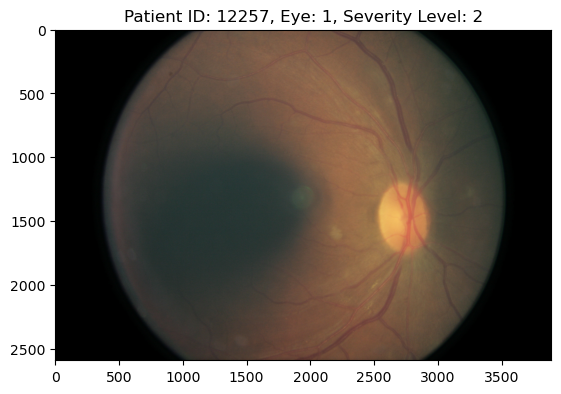

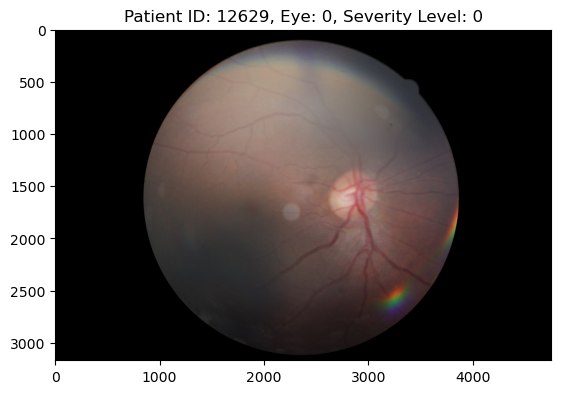

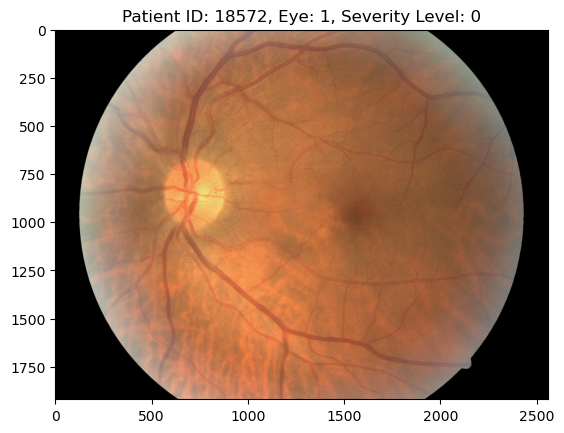

In [6]:
#viewing random images to for integrity check 
sample_indices = np.random.choice(image_dataset.index, size=3, replace=False)

for i in sample_indices:
    image = Image.open(image_dataset.loc[i, 'path'])
    plt.imshow(image)
    plt.title(f"Patient ID: {image_dataset.loc[i, 'PatientId']}, Eye: {image_dataset.loc[i, 'eye']}, Severity Level: {image_dataset.loc[i, 'level']}")
    plt.show()

In [7]:
y_array = np.array(list(image_dataset['level_cat']))

In [8]:
X_train, X_rem, y_train, y_rem = train_test_split(image_dataset['path'],image_dataset['level_cat'], test_size = 0.2, random_state = 42, stratify = y_array)

In [9]:
y_rem_array = np.array(list(y_rem))

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42, stratify = y_rem_array)

In [11]:
type(X_train)

pandas.core.series.Series

Converting my datasets to tensors for compatibility and higher efficiency with working with TensorFlow.

In [12]:
#function to take an image path and its corresponding label as input
#read the image file, decode and resize it, convert the pixel values to [0,1] by dividing by 255(normalizing)
def image_load_preprocessing(image_path, label): 
    image = tf.io.read_file(image_path) #tensorflow function that reads image file by image_path and returns a raw binary data of the image
    image = tf.image.decode_jpeg(image, channels =3) #decodes JPEG encoded image from the raw binary data, channel = 3 indicates the image is in color
    image = tf.image.resize(image,[250,250]) #ensuring all the images are the same size
    image = tf.cast(image, tf.float32)/255.0 # converts the pixel values of the image from integers to floating point and then scaling the pixel values
    return image, label

In [13]:
#converts the level_cat column which is an array to TensorFlow tensors
y_train_tf = tf.convert_to_tensor(y_train.tolist(), dtype=tf.float32)
y_val_tf = tf.convert_to_tensor(y_val.tolist(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.tolist(), dtype=tf.float32)

In [14]:
#Creates tensorflow datasets from training and validation sets using from_tensor_slices method to create dataset of pairs(image_path, label)
#apply the image_load_preprocessing function to each element using 'map.'

train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train_tf))
train_dataset = train_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)


In [15]:
#same thing with the other sets 
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val_tf))
val_dataset = val_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)

In [16]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test_tf))
test_dataset = test_dataset.map(image_load_preprocessing, num_parallel_calls = tf.data.experimental.AUTOTUNE)

In [17]:
#shuffle the training dataset, batch it into batches of 32, prefetch batches to optimize performance. Same thing with the other set, except no shuffling because it is not necessary. 
#this creates a data loading pipeline when using a tensorflow dataset and apply batching, shuffling or other processes
#prefetching it asynchronously fetches the next batch of data in the background while the GPU/TPU is training on the current batch
#this is to optimize and reduce overall training time. 
#tf.data.experimental.AUTOTUNE ensures the data is selected at random orders for the learning process
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = len(X_train)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [18]:
len(train_dataset)

211

In [19]:
len(val_dataset)

27

In [20]:
len(test_dataset)

27

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
#adding a convolution layer
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(250,250,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), 1, activation='relu',))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [24]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

In [26]:
#sets up a tensorboard callback in TensorFlow's Keras API as a visualization tool that allows you to monitor and analyse
#various aspects of the machine learning model during training. 

logdir = '/Users/shivanassori/Desktop/Folders/Data_Science_Units/Capstone/logsdir'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [27]:
history = model.fit(train_dataset, epochs=1, validation_data = val_dataset, callbacks = [tensorboard_callback])

2024-01-18 19:36:31.208103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 1119 of 6726
2024-01-18 19:36:51.200407: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 3289 of 6726
2024-01-18 19:37:11.192075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:6: Filling up shuffle buffer (this may take a while): 5333 of 6726
2024-01-18 19:37:24.932192: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


211/211 [==============================] - 179s 543ms/step - loss: 0.9176 - accuracy: 0.7285 - val_loss: 0.8821 - val_accuracy: 0.7313


In [28]:
history.history

{'loss': [0.9176307916641235],
 'accuracy': [0.7285162210464478],
 'val_loss': [0.8820524215698242],
 'val_accuracy': [0.731272280216217]}

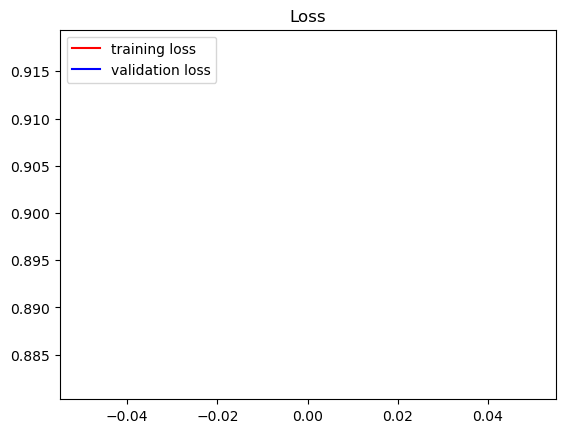

In [29]:
plt.figure()
plt.plot(history.history['loss'], color = 'red', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation loss')
plt.title('Loss')
plt.legend(loc = 'upper left')
plt.show()

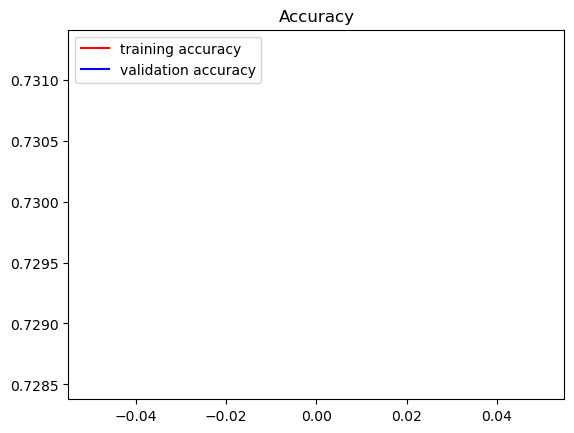

In [30]:
plt.figure()
plt.plot(history.history['accuracy'], color = 'red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation accuracy')
plt.title('Accuracy')
plt.legend(loc = 'upper left')
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalCrossentropy

In [32]:
precision = Precision()
recall = Recall()
accuracy = CategoricalCrossentropy()

In [33]:
len(test_dataset)

27

In [34]:
predictions = model.predict(test_dataset)

24/27 [=========================>....] - ETA: 1s

2024-01-18 19:39:30.901510: E tensorflow/core/lib/jpeg/jpeg_mem.cc:327] Premature end of JPEG data. Stopped at line 1966/2592


InvalidArgumentError: Graph execution error:

Detected at node DecodeJpeg defined at (most recent call last):
<stack traces unavailable>
jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext]] [Op:__inference_predict_function_2708]